# **OBJECT DETECTION PROJECT - PERSON TRACKING - FASTER RCNN**

## **Dataset Preparation**

### Install dependencies and import libraries

In [1]:
# install pycocotools
!pip install pycocotools

  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/ba/64/0451cf41a00fd5ac4501de4ea0e395b7d909e09d665e56890b5d3809ae26/pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 20.3 MB/s eta 0:00:00


In [2]:
# import the required libraries
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
import requests
import random
import shutil

from random import shuffle
from PIL import Image, ImageDraw
from IPython.display import display
from pycocotools.coco import COCO

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading all categories from coco dataset

In [3]:
# setting up coco dataset and initializing api
annFile = '/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_train2017.json'
imageDir = '/kaggle/input/coco-2017-dataset/coco2017/train2017'
coco = COCO(annFile)

loading annotations into memory...
Done (t=24.18s)
creating index...
index created!


In [4]:
# loading categories from coco dataset
category_id = 1
category = coco.loadCats(ids=category_id)
print(category)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}]


In [5]:
# loading all categories from coco dataset
category_ids = coco.getCatIds()
num_categories = len(category_ids)
print("Number of Categories: ", num_categories)
for ids in category_ids:
    category = coco.loadCats(ids=ids)
    print(category)

Number of Categories:  80
[{'supercategory': 'person', 'id': 1, 'name': 'person'}]
[{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}]
[{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}]
[{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}]
[{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]
[{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}]
[{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}]
[{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}]
[{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}]
[{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}]
[{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}]
[{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}]
[{'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}]
[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
[{'supercategory': 'animal', 'id': 16, 'name': 'bird'}]
[{'supercategory': 'animal', 'id': 17, 'name': 'cat'}]
[{'supercategory': 'animal',

### Loading images information from COCO dataset

In [6]:
# load images for the given id
image_ids = coco.getImgIds()
image_id = image_ids[0]
image_info = coco.loadImgs(image_id)
print(image_info)

[{'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}]


### Loading 'person' data from COCO dataset

In [7]:
# get the category of person from coco dataset
cat_person = coco.getCatIds(catNms=['person'])[0]

# get all of image id about 'person' category
image_ids = coco.getImgIds(catIds=[cat_person])

print("Number of image in 'person' category: ", len(image_ids))

Number of image in 'person' category:  64115


In [8]:
# displaying information about 'person' object for several first images
num_images_to_display = 5
for i in range(min(num_images_to_display, len(image_ids))):
    image_info = coco.loadImgs(image_ids[i])[0]
    annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_info['id'], catIds=[cat_person]))
    
    print(f"Image ID: {image_info['id']}, File Name: {image_info['file_name']}")
    print("Annotations: ")
    for ann in annotations:
        print(f"  - Bounding Box: {ann['bbox']}, Segmentation: {ann['segmentation']}")
    print("\n")

Image ID: 262145, File Name: 000000262145.jpg
Annotations: 
  - Bounding Box: [387.0, 71.1, 145.0, 322.0], Segmentation: [[453.0, 292.1, 457.0, 253.1, 439.0, 245.1, 438.0, 215.1, 439.0, 198.1, 420.0, 223.1, 414.0, 233.1, 401.0, 227.1, 400.0, 226.1, 398.0, 229.1, 391.0, 231.1, 387.0, 213.1, 399.0, 203.1, 404.0, 200.1, 413.0, 194.1, 418.0, 186.1, 408.0, 181.1, 415.0, 154.1, 418.0, 142.1, 419.0, 127.1, 422.0, 125.1, 419.0, 120.1, 412.0, 122.1, 407.0, 112.1, 402.0, 105.1, 389.0, 113.1, 390.0, 105.1, 395.0, 100.1, 395.0, 97.1, 398.0, 83.1, 407.0, 72.1, 417.0, 71.1, 424.0, 72.1, 428.0, 73.1, 436.0, 80.1, 441.0, 90.1, 446.0, 96.1, 456.0, 101.1, 472.0, 110.1, 480.0, 113.1, 493.0, 123.1, 499.0, 136.1, 504.0, 147.1, 509.0, 167.1, 515.0, 182.1, 531.0, 205.1, 532.0, 218.1, 525.0, 229.1, 514.0, 246.1, 499.0, 283.1, 499.0, 307.1, 499.0, 323.1, 499.0, 343.1, 505.0, 367.1, 505.0, 380.1, 505.0, 381.1, 486.0, 387.1, 482.0, 392.1, 479.0, 393.1, 469.0, 363.1, 453.0, 343.1, 451.0, 339.1, 454.0, 321.1, 453.

### Loading some images from COCO dataset in 'person' category

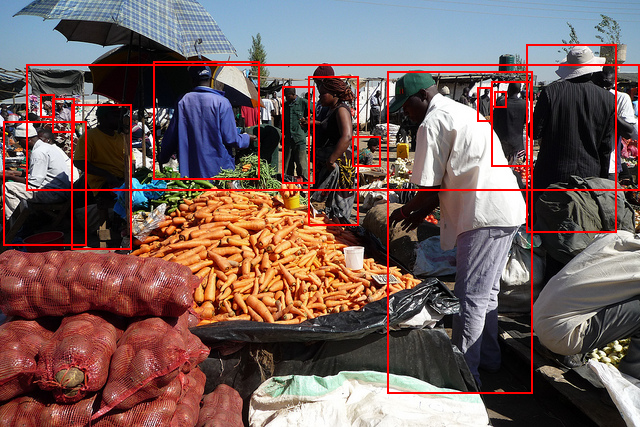

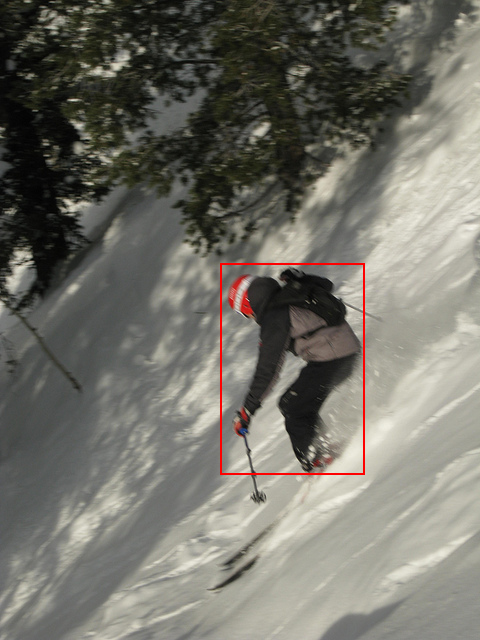

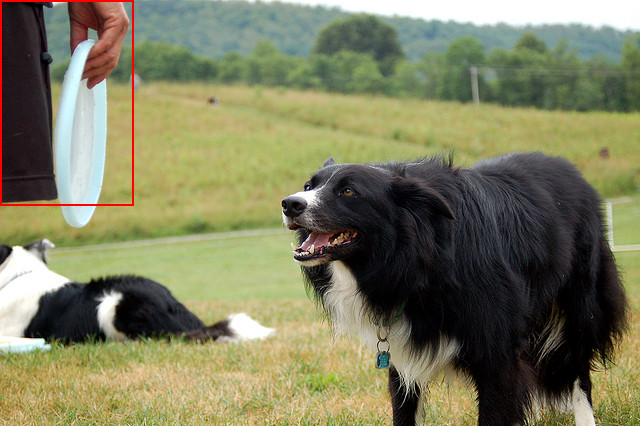

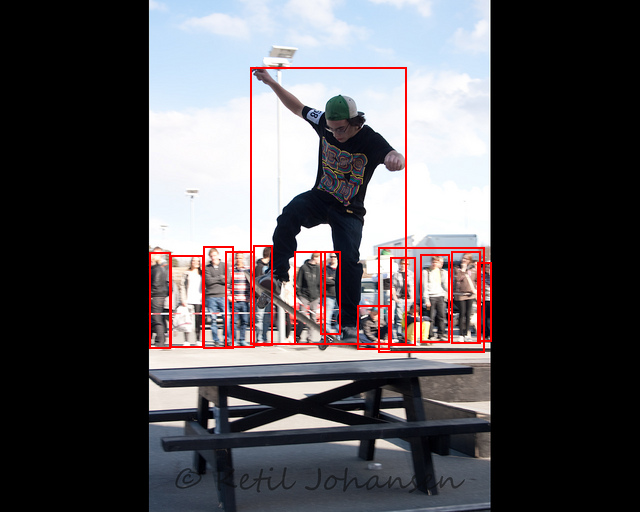

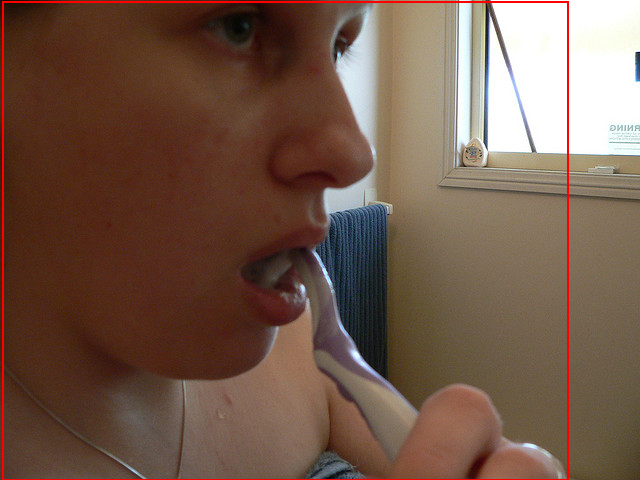

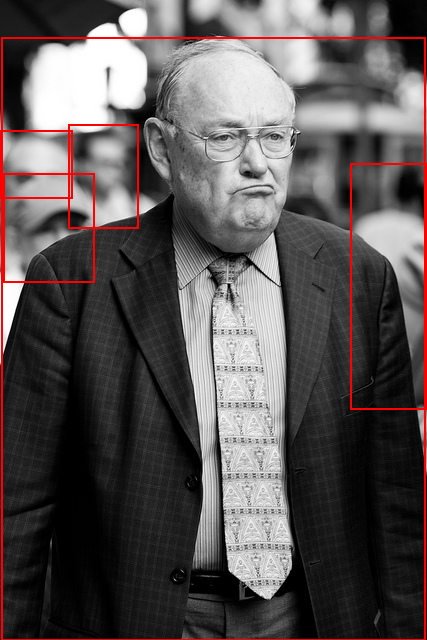

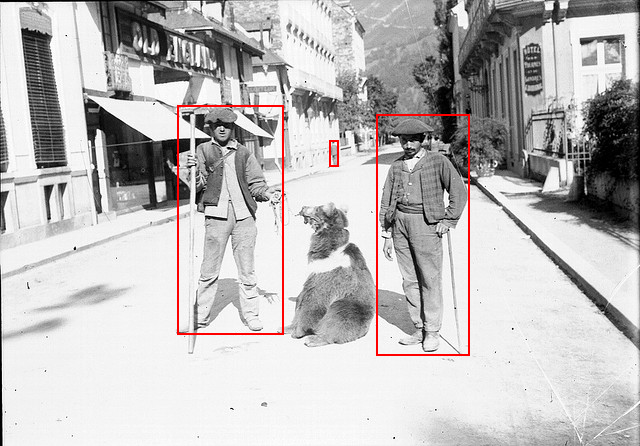

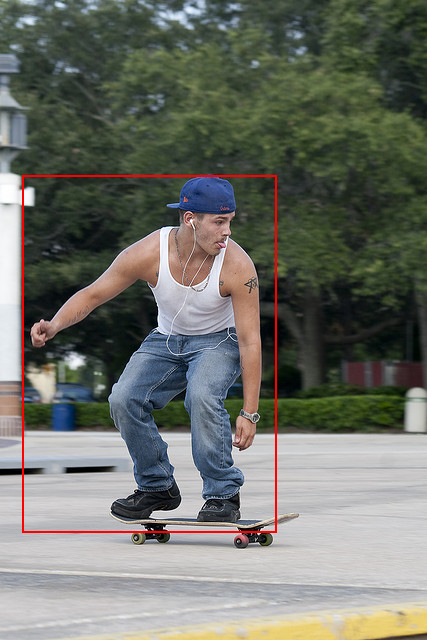

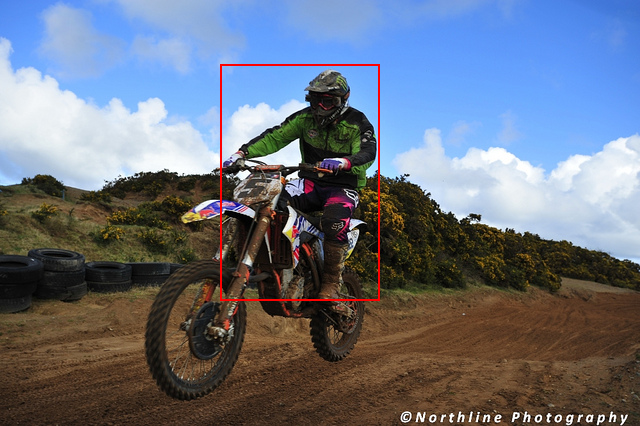

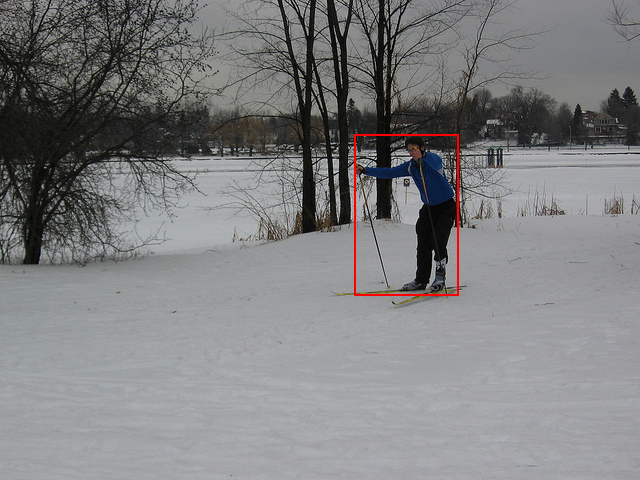

In [9]:
# displaying images with bounding box for several first images in 'person' category
num_img_to_disp = 10
for i in range(min(num_img_to_disp, len(image_ids))):
    image_info = coco.loadImgs(image_ids[i])[0] # getting image information
    image_path = os.path.join('/kaggle/input/coco-2017-dataset/coco2017/train2017', image_info['file_name'])
    image = Image.open(image_path) # loading image
    
    # getting annotation for 'person' object in an image
    annot = coco.loadAnns(coco.getAnnIds(imgIds=image_info['id'], catIds=[cat_person]))
    
    # drawing bounding box on the image
    draw = ImageDraw.Draw(image)
    for ann in annot:
        bbox = ann['bbox']
        draw.rectangle([bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]], outline='red', width=2)
    
    # show the image
    display(image)

## **Split Dataset**

In [10]:
# getting id category for 'person'
person_id = coco.getCatIds(catNms=['person'])[0]

# getting all id images include in 'person' category
img_person_id = coco.getImgIds(catIds=[person_id])

# randomize id order of image for split to train, val, test
random.shuffle(img_person_id)

# split data into train, val, test
train_image_id = img_person_id[:3000]
val_image_id = img_person_id[3000:3500]
test_image_id = img_person_id[3500:4000]

print(f"Number of Data Train: {len(train_image_id)}")
print(f"Number of Data Validation: {len(val_image_id)}")
print(f"Number of Data Test: {len(test_image_id)}")

Number of Data Train: 3000
Number of Data Validation: 500
Number of Data Test: 500


## **Prepare The Model (Faster RCNN in TensorFlow Keras)** 

In [11]:
# import library
import zipfile
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint

In [12]:
# utility function for loading image and bounding box annotation
def load_image_and_annotations(image_id):
    image_info = coco.loadImgs(image_id)[0]
    image_path = os.path.join("/kaggle/input/coco-2017-dataset/coco2017/train2017", image_info['file_name'])
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    bbox_annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id, catIds=[person_id]))
    bboxes = [ann['bbox'] for ann in bbox_annotations]
    return img_array, bboxes

In [13]:
# prepare data train
train_data = [load_image_and_annotations(image_id) for image_id in train_image_id]
train_images, train_bboxes = zip(*train_data)
max_bboxes_length = max(len(bboxes) for bboxes in train_bboxes)
train_bboxes_padded = [bboxes + [[0, 0, 0, 0]] * (max_bboxes_length - len(bboxes)) for bboxes in train_bboxes]
train_bboxes_tensor = tf.convert_to_tensor(train_bboxes_padded, dtype=tf.float32)

# prepare data validation
val_data = [load_image_and_annotations(image_id) for image_id in val_image_id]
val_images, val_bboxes = zip(*val_data)
max_bboxes_length = max(len(bboxes) for bboxes in val_bboxes)
val_bboxes_padded = [bboxes + [[0, 0, 0, 0]] * (max_bboxes_length - len(bboxes)) for bboxes in val_bboxes]
val_bboxes_tensor = tf.convert_to_tensor(val_bboxes_padded, dtype=tf.float32)

# prepare data test
test_data = [load_image_and_annotations(image_id) for image_id in test_image_id]
test_images, test_bboxes = zip(*test_data)
max_bboxes_length = max(len(bboxes) for bboxes in test_bboxes)
test_bboxes_padded = [bboxes + [[0, 0, 0, 0]] * (max_bboxes_length - len(bboxes)) for bboxes in test_bboxes]
test_bboxes_tensor = tf.convert_to_tensor(test_bboxes_padded, dtype=tf.float32)

In [14]:
# data preprocess
train_images = preprocess_input(tf.convert_to_tensor(train_images))
val_images = preprocess_input(tf.convert_to_tensor(val_images))
test_images = preprocess_input(tf.convert_to_tensor(test_images))

In [38]:
# faster rcnn model
base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(299, 299, 3))
base_model.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Flatten()(x)
predictions = layers.Dense(4, activation='linear')(x)  # 4 for bounding box coordinates (x, y, w, h)

model = Model(inputs=base_model.input, outputs=predictions)

# compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mae'])

## **Training The Model**

In [39]:
# callback for saving best model
checkpoint = ModelCheckpoint("/kaggle/working/faster_rcnn_model.h5", save_best_only=True)

# train the model
model.fit(train_images, train_bboxes_tensor,
          epochs=10,
          validation_data=(val_images, val_bboxes_tensor),
          callbacks=[checkpoint])

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'mean_squared_error/SquaredDifference' defined at (most recent call last):
    File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_47/3595715842.py", line 5, in <module>
      model.fit(train_images, train_bboxes_tensor,
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/losses.py", line 1608, in mean_squared_error
      return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
Node: 'mean_squared_error/SquaredDifference'
required broadcastable shapes
	 [[{{node mean_squared_error/SquaredDifference}}]] [Op:__inference_train_function_333904]

In [ ]:
# evaluate the model on data test
results = model.evaluate(test_images, tf.convert_to_tensor(test_bboxes))
print("Test Loss:", results[0])
print("Test MAE:", results[1])